#**MODUL 5 : MASALAH SYARAT AWAL**

>Modul ini memberikan gambaran penggunaan metode Euler untuk menyelesaikan masalah syarat awal, yaitu masalah untuk memecahkan persamaan diferensial secara numerik ketika nilai penyelesaian pada keadaan awal diketahui. Mengingat kebanyakan hukum dan masalah fisika diungkapkan dalam bentuk masalah syarat awal, maka setelah menyelesaikan bab ini pengguna diharapkan  memiliki kemampuan untuk menyelesaikan dan sekaligus memahami perilaku masalah fisika yang dihadapi.

##5.1 METODE EULER

Ditinjau suatu masalah fisika yang diwakili oleh persamaan diferensial berbentuk

\begin{equation*}
\frac{dy}{dx}=f(x,y),
\tag{5.1}
\end{equation*}

dengan $f(x,y)$ adalah fungsi yang nilai atau bentuk eksplisitnya telah diberikan oleh masalah fisika yang bersangkutan, sedang $y(x)$ adalah fungsi yang akan diselesaikan untuk sebarang $x\ge x_0$. Di dalam berbagai kasus fisika, masalah untuk menemukan $y(x)$ tersebut dipengaruhi oleh adanya persyaratan bahwa  pada saat awal, yaitu saat $x=x_0$, maka nilai fungsi pada keadaan tersebut adalah $y(x_0)=y_0$ dengan  $y_0$ berupa nilai yang diberikan. 

Dalam bentuk sederhana, salah satu metode numerik untuk menyelesaikan masalah syarat awal tersebut adalah dengan menggunakan metode Euler yang memiliki ungkapan:

\begin{equation*}
y_{i+1}=y_i + hf_i,\quad i=0,1,2,\dots
\tag{5.2}
\end{equation*}

dengan $y_i\equiv y(x_i)$, $f_i\equiv f(x_i,y_i)$ dan ukuran langkah $h=x_{i+1}-x_i$. Dengan ungkapan tersebut maka saat $y_0$ diketahui berdasar syarat awal maka $y_1$ akan dapat dihitung. Kemudian ketika $y_1$ sudah diperoleh maka $y_2$ dapat dihitung dan apabila diteruskan maka $y_3, y_4, \dots, y_N$ akan dapat diperoleh. Ini berarti nilai $y(x)$ sudah berhasil diperoleh untuk sebarang nilai $x$ yang kita tentukan. 

##5.2. Contoh masalah fisika : Gerak osilasi
Tinjau sebuah pegas dengan tetapan gaya $k$ yang pada ujungnya terdapat partikel
bermassa $m$. Ketika pegas diregangkan dan dilepaskan lagi maka partikel akan menjalani
gerak osilasi yang diberikan oleh persamaan gaya

 
\begin{equation}
  \frac{dv}{dt}=a=\frac{F}{m}=\frac{-kx}{m}.
  \tag{5.3}
\end{equation}

dengan $v$ adalah kecepatan sebagai fungsi waktu $t$, $a$ adalah percepatan, $F$ adalah gaya dan $x$ adalah posisi partikel. Dari definisi kecepatan diperoleh
\begin{equation}
  \frac{dx}{dt}=v.
  \tag{5.4}
\end{equation}

Jika dibandingan bentuk persamaan (5.3) maupun persamaan (5.4) terlihat sama dengan persamaan (5.1). Ini berarti metode Euler dapat diterapkan ke persamaan (5.3) untuk mendapatkan $v(t)$. Dari perolehan $v(t)$ tersebut maka ruas kanan persamaan (5.4) dapat diketahui. Kemudian jika metode Euler  diterapkan  pada persamaan (5.4) maka $x(t)$ akan dapat diperoleh juga. Secara ringkas untuk mendapatkan $v(t)$ dan $x(t)$ bagi gerak osilasi partikel maka langkah numerik yang ditempuh adalah:

1. Gunakan metode Euler ke persamaan (5.3) dalam bentuk
\begin{equation}
v_{i+1}=v_i-h\frac{kx_{i}}{m},
\end{equation}
2. Gunakan metode Euler ke persamaan (5.3) dalam bentuk
\begin{equation}
x_{i+1}=x_i+hv_{i},
\end{equation}
dengan nilai $x_0$ dan $v_0$ adalah nilai $x(t)$ dan $v(t)$ saat $t=t_0$ yang diberikan oleh syarat awal serta $i=0,1,2,\dots,N$ dengan $t_i=t_0+hi$. 

##6.3. Ketelitian komputasi
Kenyataan bahwa partikel dalam sistem pegas merupakan sistem konservatif yang memiliki nilai tenaga total $E$ ajeg maka nilai tersebut dapat dimanfaatkan sebagai indikator ketelitian bagi penyelesaian komputasi dengan metode Euler di atas. Untuk melihat keajegan tersebut maka dapat dihitung $E$ melalui kaitan
\begin{equation}
E=\frac{1}{2}mv^2+\frac{1}{2}kx^2,
\tag{6.5}
\end{equation}

Di bawah ini adalah program yang mengimplementasikan metode Euler pada permasalahan syarat awal yang ditulis dengan menggunakan bahasa pemrograman Python.




In [ ]:
# CONTOH PROGRAM PENYELESAIAN MASALAH SYARAT AWAL DENGAN MENGGUNAKAN METODE EULER
import numpy as np
import matplotlib.pyplot as plt
#----------------------------------------------------------------------------------------
# Nilai masukan tetapan pegas k, massa partikel m, interval waktu (dt), dan jumlah data n
#----------------------------------------------------------------------------------------
n=50
t0=0
ta=5
dt=(ta-t0)/n   # menghitung interval waktu dt atau h
k=1
m=1

#----------------------------------------------------------------------------------------------------------
# Deklarasi ukuran array/list untuk menyimpan nilai posisi x, waktu t, kecepatan v, gaya F, dan energi total (En_total)
#----------------------------------------------------------------------------------------------------------
xi_l = [0]*(n+1)
ti_l = [0]*(n+1)
vi_l = [0]*(n+1)
Fi_l = [0]*(n+1)
En_total_l = [0]*(n+1)

#----------------------------------------------------------------------------------------------------------
# Nilai x(t) dan v(t) saat t=t0 (syarat awal)
#----------------------------------------------------------------------------------------------------------
ti_l[0]=0
xi_l[0]=0
vi_l[0]=2
Fi_l[0]=-k*xi_l[0]/m   # bentuk fungsi gaya 
En_total_l[0]=(m/2)*(vi_l[0])**2 + (k/2)*(xi_l[0])**2

x0=0
v0=2
En_total0=En_total_l[0]
fv=-k*x0/m
fx=v0

#----------------------------------------------------------------------------------------------------------
# Implementasi metode Euler yaitu menghitung v(t) dan x(t)
# disertai menghitung energi total pada setiap waktu
# sehingga dapat dilihat apakah tenaga total ajeg atau tidak
#----------------------------------------------------------------------------------------------------------

print("t       x_i   v_i    Energi total")
print("%2.3f  %4.3f  %4.3f  %4.3f"% (t0,x0,v0,En_total0))
for i in range(1,(n+1)):   
    ti=i*dt
    vi=v0+dt*fv
    xi=x0+dt*fx
    En_total=(m/2)*vi**2 + (k/2)*xi**2
    print("%2.3f  %4.3f  %4.3f  %4.3f"% (ti,xi,vi,En_total))

    ti_l[i]=ti
    vi_l[i]=vi
    xi_l[i]=xi
    En_total_l[i]=En_total

    v0=vi
    x0=xi
    fv=-k*x0/m
    fx=v0
   



t       x_i   v_i    Energi total
0.000  0.000  2.000  2.000
0.100  0.200  2.000  2.020
0.200  0.400  1.980  2.040
0.300  0.598  1.940  2.061
0.400  0.792  1.880  2.081
0.500  0.980  1.801  2.102
0.600  1.160  1.703  2.123
0.700  1.330  1.587  2.144
0.800  1.489  1.454  2.166
0.900  1.635  1.305  2.187
1.000  1.765  1.142  2.209
1.100  1.879  0.965  2.231
1.200  1.976  0.777  2.254
1.300  2.053  0.580  2.276
1.400  2.111  0.374  2.299
1.500  2.149  0.163  2.322
1.600  2.165  -0.052  2.345
1.700  2.160  -0.268  2.369
1.800  2.133  -0.484  2.392
1.900  2.085  -0.698  2.416
2.000  2.015  -0.906  2.440
2.100  1.924  -1.108  2.465
2.200  1.814  -1.300  2.489
2.300  1.684  -1.481  2.514
2.400  1.535  -1.650  2.539
2.500  1.370  -1.803  2.565
2.600  1.190  -1.940  2.591
2.700  0.996  -2.059  2.616
2.800  0.790  -2.159  2.643
2.900  0.574  -2.238  2.669
3.000  0.351  -2.295  2.696
3.100  0.121  -2.330  2.723
3.200  -0.112  -2.342  2.750
3.300  -0.346  -2.331  2.777
3.400  -0.579  -2.297  2.805

Kolom pertama pada hasil di atas menunjukkan waktu $t$, kolom kedua adalah
posisi $x(t)$, kolom ketiga adalah kecepatan $v(t)$ dan kolom keempat adalah tenaga total $E$. Jika dilihat secara sepintas pada kolom kedua dan ketiga nampak bahwa posisi dan kecepatan sudah sesuai seperti fungsi sinus atau cosinus yaitu menunjukkan gerak osilasi. Tetapi dari kolom keempat nampak bahwa nilai tenaga total ternyata tidak ajeg tetapi berubah terhadap waktu. Ini menunjukkan bahwa hasil yang diperoleh dengan $h = 0.1$ tersebut belum teliti meskipun sudah menunjukkan indikasi ke penyelesaian yang benar yaitu munculnya gerak osilasi. 

Tampilan grafik dari hasil di atas dapat diperoleh dengan mengikuti perintah program *Python* berikut.

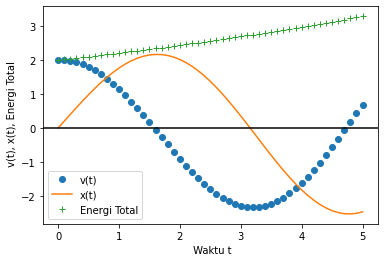

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

plt.plot(ti_l,vi_l,'o')
plt.plot(ti_l,xi_l,'-')
plt.plot(ti_l,En_total_l,'+')
plt.xlabel(" Waktu t")
plt.ylabel(" v(t), x(t), Energi Total")
plt.legend(["v(t)","x(t)","Energi Total"],loc='best')
plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')
plt.show()

##6.4. TUGAS
1. Perbaiki hasil yang diperoleh di atas dengan mengubah nilai $h$ sehingga selain
diperoleh gerak osilasi yang benar juga diperoleh ketelitian yang tinggi yaitu
dengan dibuktikan oleh perolehan nilai $E$ yang ajeg.
2. Analisis perubahan nilai masukan $m$, $k$, $v_{0}$, $x_{0}$, serta $h$ terhadap hasil akhir.
3. Tunjukkan dari hasil data atau grafik yang anda peroleh bahwa periode gerak
osilasi cocok dengan rumus yang diperoleh secara analitik yaitu:
\begin{eqnarray}
  T=2\pi\sqrt{\frac{m}{k}}.
  \tag{6}
\end{eqnarray}